In [3]:
#Importing packages and data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

sales_data = pd.read_csv('vgsales.csv')

In [4]:
#Taking a look at the data
sales_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
#Checking the column data Type
sales_data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [9]:
#The year has come through as a decimal float, it should be converted into an integer

sales_data['Year'] = sales_data['Year'].astype('Int64')
sales_data.dtypes

Rank              int64
Name             object
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [12]:
#Dropping any duplicate rows and any null values

sales_data= sales_data.drop_duplicates()
print(f" Shape of data frame after dropping duplicates: {sales_data.shape}")
      
sales_data.dropna(how= 'any', inplace = True)
print(f"\n Shape of data frame after dropping nan values: {sales_data.shape}")

 Shape of data frame after dropping duplicates: (16598, 11)

 Shape of data frame after dropping nan values: (16291, 11)


In [14]:
#double checking missing values
missing_pct = pd.DataFrame(sales_data.isnull().sum(), columns = ['Missing % of Data'])
missing_pct

,Missing % of Data
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [16]:
#Identifying the most sold game (globally) by year and platform
#Sorting data by global sales and dropping the duplicate values,
#leaving the highest value in the year, and dropping unneccesary columns

sales_data_by_year = sales_data.copy()
sales_data_by_year = sales_data_by_year.sort_values('Global_Sales', ascending=False).drop_duplicates(['Year'])
sales_data_by_year = sales_data_by_year.sort_values('Year', ascending=True).drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Rank'], axis=1)
sales_data_by_year = sales_data_by_year.reset_index(inplace=False, drop=True)
sales_data_by_year

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Asteroids,2600,1980,Shooter,Atari,4.31
1,Pitfall!,2600,1981,Platform,Activision,4.50
2,Pac-Man,2600,1982,Puzzle,Atari,7.81
3,Baseball,NES,1983,Sports,Nintendo,3.20
4,Duck Hunt,NES,1984,Shooter,Nintendo,28.31
5,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
6,The Legend of Zelda,NES,1986,Action,Nintendo,6.51
7,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,4.38
8,Super Mario Bros. 3,NES,1988,Platform,Nintendo,17.28
9,Tetris,GB,1989,Puzzle,Nintendo,30.26


1)Years 2016,2017, and 2020 are likely errors.
2)39 unique years with 3 likely errors but 36 years worth of accurate data.

In [18]:
# Identifying the most sold game by platform 
#sorting data by global sales and dropping the duplicate values

sales_data_by_plat = sales_data.copy()
sales_data_by_plat = sales_data_by_plat.sort_values('Global_Sales', ascending=False).drop_duplicates(['Platform'])
sales_data_by_plat = sales_data_by_plat.sort_values('Platform', ascending=False).drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Rank'], axis=1)
sales_data_by_plat = sales_data_by_plat.reset_index(inplace=False, drop=True)
sales_data_by_plat

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,7.30
1,Halo 2,XB,2004,Shooter,Microsoft Game Studios,8.49
2,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,21.82
3,Mario Kart 8,WiiU,2014,Racing,Nintendo,6.96
4,Wii Sports,Wii,2006,Sports,Nintendo,82.74
5,Final Fantasy,WS,2000,Role-Playing,SquareSoft,0.51
6,Doukyuusei,TG16,1995,Adventure,NEC,0.14
7,Super Mario World,SNES,1990,Platform,Nintendo,20.61
8,Sonic CD,SCD,1993,Platform,Sega,1.50
9,Virtua Fighter 2,SAT,1995,Fighting,Sega,1.93


Wii has the highest number of global sales for an individual game. 

In [19]:
#Identify top 5 publishers and distrubution of sales
#using groupby to sum sales 
descPublisher = sales_data.copy()
descPublisher = descPublisher.groupby(by='Publisher')['Global_Sales'].sum().reset_index()
descPublisher = descPublisher.sort_values('Global_Sales', ascending=False).reset_index(drop=True)
descPublisher.head()

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54


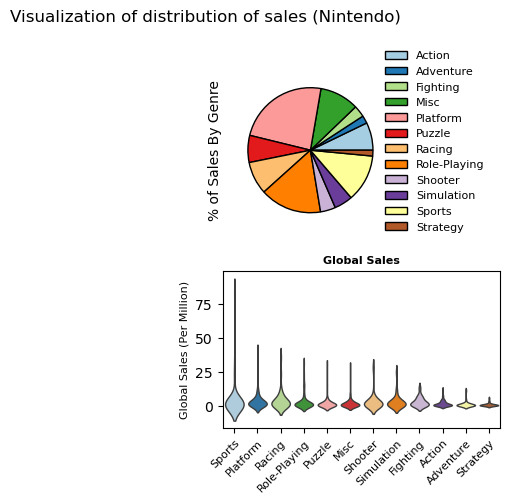

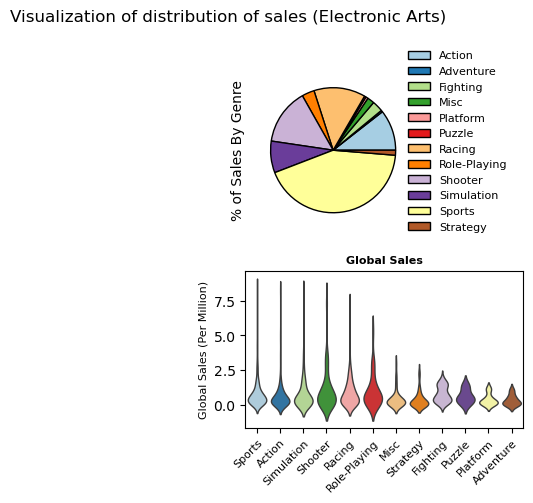

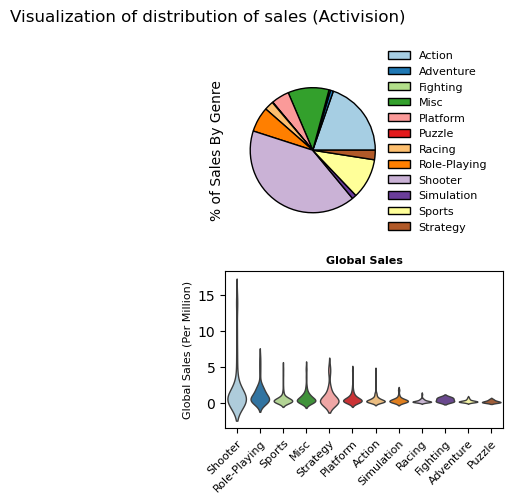

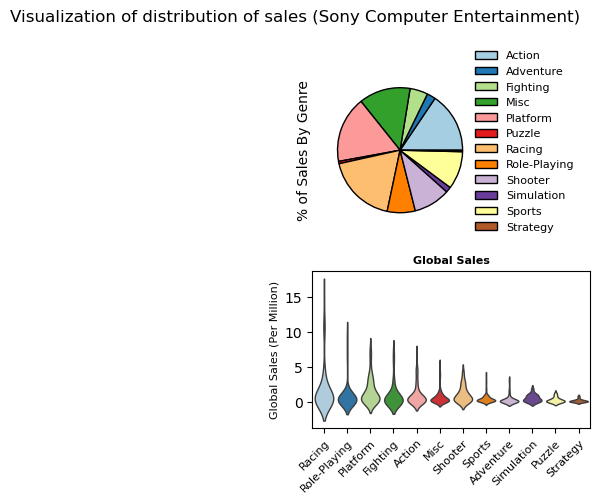

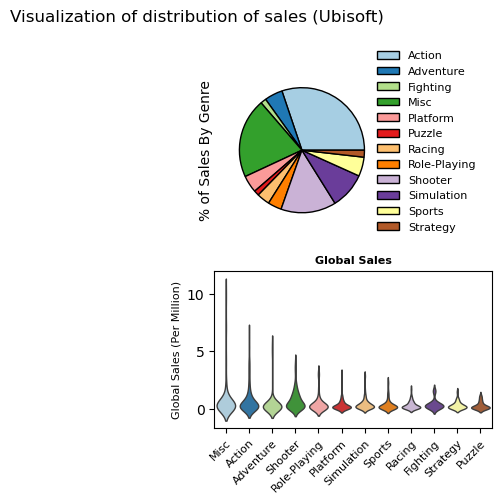

In [24]:
#Placing the names of the top 5 pulishers into an array
top5 = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft']
#Selecting a colour palette
pal = sns.color_palette('Paired', 12)
pal = pal.as_hex()[0:12]

#Initializing a for loop to generate each visualization set for each publish in the top 5 array
for i in top5:
    #Querying for specifically one pulisher
    publisherData = sales_data.query(f"Publisher == '{i}'")
    fig = plt.figure()
    
    #Initializing a subplot lay out of 2 figures
    gs = fig.add_gridspec(2,2)
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 1])
    fig.suptitle(f'Visualization of distribution of sales ({i})')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95], pad=1)
    
    #Generating a Violin plot of Global sales by Genre
    try:
        sns.violinplot(x="Genre", y="Global_Sales", data=publisherData,ax=ax2, scale="width", inner=None,linewidth=1, edgecolor="black", palette=pal)
        ax2.tick_params(labelrotation=45, axis="x", labelsize=8)
        plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        ax2.set_ylabel('Global Sales (Per Million)', fontsize=8)
        ax2.set_title('Global Sales', fontsize=8, fontweight="bold")
        ax2.set_xlabel('', fontsize=8)
    except:
        pass
    
    
    #Generating a pie chart of global sales by genre
    try:
        genregroup = publisherData.groupby(['Genre'])["Global_Sales"].sum()
        genregroup.plot(kind='pie', y=["Global_Sales"], ax=ax1, legend=True,labeldistance=None, wedgeprops={'edgecolor':'black','linewidth': 1, 'linestyle': 'solid'}, colors=pal)
        ax1.legend(bbox_to_anchor=(1.68,1.2), loc="upper right", prop={"size":8}, frameon=False)
        box = ax1.get_position()
        box.x0 = box.x0 - 0.08
        box.x1 = box.x1 - 0.08
        ax1.set_position(box)
        ax1.set_ylabel('% of Sales By Genre', fontsize=10)
    except:
        pass

In [25]:
top5data = sales_data.copy()
top5data = top5data[top5data['Publisher'].isin(top5)]
top5dataSlice = top5data.loc[:, ['Year', 'Publisher', 'Global_Sales']]

<AxesSubplot:title={'center':'Summary of volume of games by year by publisher'}, xlabel='Year', ylabel='Count of Games'>

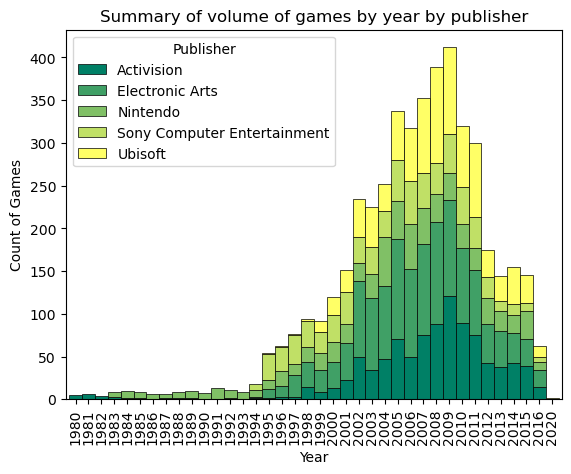

In [26]:
sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

countData = top5dataSlice.groupby(['Publisher','Year']).size().reset_index().pivot(columns='Publisher', index='Year', values=0)
countData.plot(kind="bar", stacked=True, linewidth=0.5, edgecolor="black", width=1, colormap="summer", ylabel="Count of Games", title="Summary of volume of games by year by publisher")